# EDA graphData 

In [1]:
import pandas as pd
import plotly.express as px
from collections import defaultdict
from tqdm import tqdm
import numpy as np
import json

In [2]:
graph_data_path_root = '/kaggle/input/graphdata/graph_data/raw'


In [3]:
id_service_df = pd.read_csv(f'{graph_data_path_root}/id_service.csv', index_col=0)
id_service_df

,Service
0,ts-order-service
1,ts-station-service
2,ts-travel2-service
3,ts-ticketinfo-service
4,ts-basic-service
5,ts-route-service
6,ts-train-service
7,ts-price-service
8,ts-order-other-service
9,ts-seat-service


In [4]:
id_url_temp_df = pd.read_csv(f'{graph_data_path_root}/id_url+temp.csv', index_col=0)
id_url_temp_df

,EventTemplate
0,"draw back payment, userId: <:UNIQUE_ID:>, mone..."
1,[Draw Back Money] Draw back money...
2,[Cancel Order Service] Delay Process，Wrong Can...
3,[Cancel Order] Order <:*:> <:*:>
4,[Get Order By Id] Order Id: <:*:>
...,...
1508,{POST}/api/v1/routeplanservice/routePlan/minSt...
1509,{GET}/api/v1/routeservice/routes/{startId}/{te...
1510,{POST}/api/v1/travelservice/trips/routes
1511,{POST}/api/v1/travel2service/trips/routes


In [5]:
id_url_type_df = pd.read_csv(f'{graph_data_path_root}/id_url+type.csv', index_col=0)
id_url_type_df

,Temp,Type,Content
0,0,4,"draw back payment, userId: <:UNIQUE_ID:>, mone..."
1,1,4,[Draw Back Money] Draw back money...
2,2,4,[Cancel Order Service] Delay Process，Wrong Can...
3,3,4,[Cancel Order] Order <:*:> <:*:>
4,4,4,[Get Order By Id] Order Id: <:*:>
...,...,...,...
1873,1511,3,Client Response {POST}/api/v1/travel2service/t...
1874,1512,0,Server Request /api/v1/consignpriceservice/con...
1875,1512,2,Server Response /api/v1/consignpriceservice/co...
1876,1512,1,Client Request /api/v1/consignpriceservice/con...


In [6]:
id_url_temp_df.iloc[1512].values

array(['/api/v1/consignpriceservice/consignprice/0.0/false'], dtype=object)

In [7]:
id_url_type_df.Type.unique()

array([4, 0, 2, 1, 3, 5, 6, 7])

In [8]:
id_url_type_df.iloc[1874].values, id_url_type_df.iloc[1875].values, id_url_type_df.iloc[1876].values, id_url_type_df.iloc[1877].values 


(array([1512, 0,
        'Server Request /api/v1/consignpriceservice/consignprice/0.0/false'],
       dtype=object),
 array([1512, 2,
        'Server Response /api/v1/consignpriceservice/consignprice/0.0/false'],
       dtype=object),
 array([1512, 1,
        'Client Request /api/v1/consignpriceservice/consignprice/0.0/false'],
       dtype=object),
 array([1512, 3,
        'Client Response /api/v1/consignpriceservice/consignprice/0.0/false'],
       dtype=object))

**Process Files**

In [9]:
import json
with open(f'{graph_data_path_root}/process0.jsons', 'r') as fin:
    line = fin.readline()
sample = json.loads(line)
sample.keys()

dict_keys(['edge_index', 'edge_attr', 'node_info', 'trace_id', 'trace_bool', 'error_trace_type'])

In [10]:
for k in sample.keys():
    if isinstance(sample[k], list):
        print(f'{k} size: {len(sample[k])}')
    else:
        print(f'{k}: {sample[k]}')

edge_index size: 1023
edge_attr size: 1023
node_info size: 902
trace_id: 007efb9578bc4f1ab3eab03cb5188af5.38.16292559335640285
trace_bool: True
error_trace_type: normal


In [11]:
#max index
import numpy as np
np.unique(np.array(sample['edge_index']).flatten()).max()

901

In [12]:
set(sample['edge_attr'])


{0, 1, 2}

In [13]:
sample['node_info'][:10]


[[1460.0, 13, -1, 0, 0, 0, 1666],
 [1460.0, 13, -1, 623, 2, 0, 1667],
 [502.0, 13.0, -1, 1.0, 4, 0, 502],
 [1370.0, 13.0, 13, 1.0, 1, 1, 1393],
 [1370.0, 13.0, 13, 6.0, 1, 2, 1393],
 [1370.0, 13.0, 13, 6.0, 3, 1, 1394],
 [44.0, 13.0, -1, 6.0, 4, 0, 44],
 [1370.0, 13.0, 13, 11.0, 3, 2, 1394],
 [44.0, 13.0, -1, 11.0, 4, 0, 44],
 [1388.0, 13.0, 13, 12.0, 5, 3, 1448]]

In [14]:
trace_info = defaultdict(list)

for idx in range(0, 8):
    with open(f'{graph_data_path_root}/process{idx}.jsons', 'r') as fin:
        for line in tqdm(fin.readlines()):
            trace = json.loads(line)
            trace_info['trace_id'].append(trace['trace_id'])
            trace_info['trace_bool'].append(trace['trace_bool'])
            trace_info['error_trace_type'].append(trace['error_trace_type'])
            trace_info['process_idx'].append(idx)

trace_info_df = pd.DataFrame(trace_info)
trace_info_df

100%|██████████| 16560/16560 [00:05<00:00, 2864.10it/s]


,trace_id,trace_bool,error_trace_type,process_idx
0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,True,normal,0
1,007efb9578bc4f1ab3eab03cb5188af5.38.1629256014...,True,normal,0
2,007efb9578bc4f1ab3eab03cb5188af5.38.1629256021...,True,normal,0
3,007efb9578bc4f1ab3eab03cb5188af5.38.1629256027...,True,normal,0
4,007efb9578bc4f1ab3eab03cb5188af5.38.1629256039...,True,normal,0
...,...,...,...,...
132480,ffc3e79734424b65942466e0d8d432e2.46.1628705864...,False,F04-02,7
132481,ffc3e79734424b65942466e0d8d432e2.47.1628705862...,False,F04-02,7
132482,ffc3e79734424b65942466e0d8d432e2.47.1628705864...,False,F04-02,7
132483,ffc3e79734424b65942466e0d8d432e2.47.1628705867...,False,F04-02,7


In [15]:
trace_info_df.error_trace_type.unique()


array(['normal', 'F02-06', 'F07-04', 'F07-05', 'F04-06', 'F23-05',
       'F01-03', 'F05-01', 'F12-01', 'F01-02', 'F05-03', 'F23-04',
       'F05-02', 'F14-03', 'F25-02', 'F03-07', 'F03-08', 'F13-03',
       'F07-02', 'F02-04', 'F04-01', 'F08-01', 'F25-01', 'F25-03',
       'F24-01', 'F24-03', 'F02-01', 'F02-02', 'F02-03', 'F04-03',
       'F13-05', 'F07-01', 'F08-04', 'F14-02', 'F08-02', 'F12-03',
       'F03-03', 'F11-02', 'F11-01', 'F04-07', 'F04-08', 'F23-01',
       'F23-02', 'F23-03', 'F13-04', 'F13-01', 'F01-01', 'F08-05',
       'F01-04', 'F01-05', 'F11-05', 'F11-04', 'F11-03', 'F08-03',
       'F03-01', 'F05-05', 'F07-03', 'F24-02', 'F03-04', 'F04-05',
       'F03-06', 'F03-05', 'F12-05', 'F05-04', 'F02-05', 'F03-02',
       'F14-01', 'F12-02', 'F13-02', 'F04-04', 'F04-02'], dtype=object)

In [16]:
# trace_info_df['trace_id'] = trace_info_df['trace_id'].apply(lambda x: trace_id_idx[x])
trace_info_df.to_csv(f'/kaggle/working/trace_info.csv', index=False)

In [17]:
trace_info_df.shape

(132485, 4)

In [19]:
px.histogram(trace_info_df, x=['error_trace_type'], color='process_idx')


**edge info**

In [20]:
import json
edge_details = defaultdict(list)
for idx in range(0, 9):
    with open(f'{graph_data_path_root}/process{idx}.jsons', 'r') as fin:
        for line in tqdm(fin.readlines()):
            trace = json.loads(line)
            node_info = trace['node_info']
            for (src_id, dst_id), edge_type in zip(trace['edge_index'], trace['edge_attr']):
                edge_details['src_id'].append(src_id)
                edge_details['src_type'].append(node_info[src_id][4])
                edge_details['dst_id'].append(dst_id)
                edge_details['dst_type'].append(node_info[dst_id][4])
                edge_details['edge_type'].append(edge_type)
                edge_details['trace_id'].append(trace['trace_id'])
            break
    break
edge_details_df = pd.DataFrame(edge_details)
edge_details_df

  0%|          | 0/16559 [00:00<?, ?it/s]


,src_id,src_type,dst_id,dst_type,edge_type,trace_id
0,0,0,2,4,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
1,2,4,3,1,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
2,3,1,4,1,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
3,4,1,5,3,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
4,5,3,6,4,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
...,...,...,...,...,...,...
1018,878,2,865,3,2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
1019,883,2,804,3,2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
1020,888,2,127,3,2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
1021,893,2,831,3,2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...


In [21]:
edge_details_df['trace_id'][0]

'007efb9578bc4f1ab3eab03cb5188af5.38.16292559335640285'

In [22]:
edge_details_df[['src_id', 'dst_id']].values.flatten().max()


901

In [23]:
edge_details_df.groupby('edge_type')[['trace_id']].count()


,trace_id
edge_type,
0,779
1,122
2,122


In [24]:
edge_details_df.src_id.max(), edge_details_df.dst_id.max()


(901, 901)

In [25]:
sample_edges = edge_details_df[edge_details_df['trace_id'] == '007efb9578bc4f1ab3eab03cb5188af5.38.16292559335640285']
sample_edges

,src_id,src_type,dst_id,dst_type,edge_type,trace_id
0,0,0,2,4,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
1,2,4,3,1,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
2,3,1,4,1,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
3,4,1,5,3,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
4,5,3,6,4,0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
...,...,...,...,...,...,...
1018,878,2,865,3,2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
1019,883,2,804,3,2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
1020,888,2,127,3,2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
1021,893,2,831,3,2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...


In [26]:
sample_edges[sample_edges['edge_type'] == 1].iloc[0]


src_id                                                       3
src_type                                                     1
dst_id                                                     135
dst_type                                                     0
edge_type                                                    1
trace_id     007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...
Name: 779, dtype: object

In [27]:
unique_type_relations = edge_details_df.groupby(['src_type', 'dst_type'])[['trace_id']].count().reset_index()
unique_type_relations

,src_type,dst_type,trace_id
0,0,4,113
1,0,5,10
2,1,0,122
3,1,1,16
4,1,3,95
5,1,4,10
6,1,5,1
7,2,3,122
8,3,1,8
9,3,2,37


In [28]:
#each node srch with neighbours 
relation_neigh_df = edge_details_df.groupby(['trace_id', 'src_type', 'dst_type', 'src_id']).agg(
    {
        'dst_id': lambda x: x.tolist()
    }
).reset_index()

relation_neigh_df

,trace_id,src_type,dst_type,src_id,dst_id
0,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,0,4,0,[2]
1,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,0,4,135,[137]
2,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,0,4,140,[142]
3,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,0,4,146,[148]
4,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,0,4,150,[152]
...,...,...,...,...,...
1018,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,5,5,778,[779]
1019,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,5,5,875,[876]
1020,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,5,5,880,[881]
1021,007efb9578bc4f1ab3eab03cb5188af5.38.1629255933...,5,5,890,[891]


In [29]:
# #txt with neighbours
# for src_type, dst_type in unique_type_relations[['src_type', 'dst_type']].values:
#     print(f'Processing {src_type}_{dst_type}')
#     cond = (relation_neigh_df['src_type'] == src_type) & (relation_neigh_df['dst_type'] == dst_type)
#     relation_neigh_df[['trace_id', 'src_id', 'dst_id_list']][cond].to_csv(f'{output_root_dir}/{src_type}_{dst_type}_list.txt', sep=':', index=None, header=False)

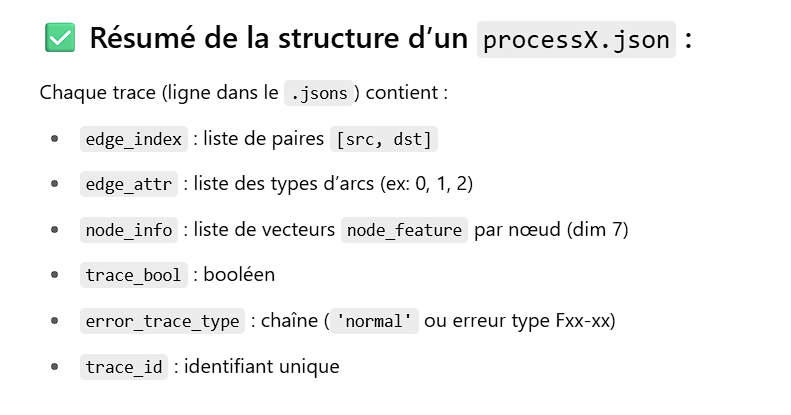

In [ ]:
# #format data officiels 
# import os
# import json
# import numpy as np
# import networkx as nx

# # === PARAMÈTRES ===
# output_dir = "deeptralog_format"
# os.makedirs(output_dir, exist_ok=True)
# max_graphs_per_file = 5000

# relation_map = {
#     "sequence": 0,
#     "sync_request": 1,
#     "sync_response": 2,
#     "async_request": 3
# }

# trace_ids = combined_df_with_embeddings["TraceId"].unique()
# total_traces = len(trace_ids)

# file_index = 0
# graph_counter = 0

# f_out = open(os.path.join(output_dir, f"process{file_index}.json"), "w")

# for i, trace_id in enumerate(trace_ids):
#     trace_df = combined_df_with_embeddings[combined_df_with_embeddings['TraceId'] == trace_id].copy()
#     G = nx.DiGraph()

#     # 1. Ajouter les nœuds
#     for idx, row in trace_df.iterrows():
#         G.add_node(idx,
#                    Timestamp=row['Timestamp'],
#                    SpanId=row['SpanId'],
#                    EventType=row['EventType'],
#                    embedding=row['embedding'],
#                    ParentSpan=row['ParentSpan'],
#                    IsError=row['IsError'])

#     # 2. Arêtes intra-span : "sequence"
#     for span_id, group in trace_df.groupby('SpanId'):
#         group_sorted = group.sort_values(by='Timestamp')
#         indices = group_sorted.index.to_list()
#         for j in range(len(indices) - 1):
#             G.add_edge(indices[j], indices[j + 1], relationship='sequence')

#     # 3. Arêtes inter-span
#     for span_id, span_df in trace_df.groupby("SpanId"):
#         parent_span_id = span_df["ParentSpan"].iloc[0]
#         if parent_span_id == -1 or parent_span_id not in trace_df["SpanId"].values:
#             continue
#         parent_df = trace_df[trace_df["SpanId"] == parent_span_id]

#         # SYNC REQUEST
#         parent_client_req = parent_df[parent_df["EventType"] == "Client Request"]
#         child_server_req = span_df[span_df["EventType"] == "Server Request"]
#         if not parent_client_req.empty and not child_server_req.empty:
#             G.add_edge(parent_client_req.index[0], child_server_req.index[0], relationship="sync_request")

#         # SYNC RESPONSE
#         child_server_resp = span_df[span_df["EventType"] == "Server Response"]
#         parent_client_resp = parent_df[parent_df["EventType"] == "Client Response"]
#         if not child_server_resp.empty and not parent_client_resp.empty:
#             G.add_edge(child_server_resp.index[0], parent_client_resp.index[0], relationship="sync_response")

#         # ASYNC REQUEST
#         parent_producer = parent_df[parent_df["EventType"] == "Producer"]
#         child_consumer = span_df[span_df["EventType"] == "Consumer"]
#         if not parent_producer.empty and not child_consumer.empty:
#             G.add_edge(parent_producer.index[0], child_consumer.index[0], relationship="async_request")

#     # 4. Construire le JSON
#     node_id_map = {old_id: new_id for new_id, old_id in enumerate(G.nodes)}
#     edge_index = [[], []]
#     edge_attr = []
#     node_info = []

#     for old_id in G.nodes:
#         node_info.append(G.nodes[old_id]['embedding'])

#     for src, dst, data in G.edges(data=True):
#         edge_index[0].append(node_id_map[src])
#         edge_index[1].append(node_id_map[dst])
#         edge_attr.append(relation_map.get(data['relationship'], -1))

#     # 5. Label
#     trace_error = trace_df["IsError"].any()
#     error_type = "anomalous" if trace_error else "normal"

#     process_json = {
#         "edge_index": edge_index,
#         "edge_attr": edge_attr,
#         "node_info": node_info,
#         "trace_id": str(trace_id),
#         "trace_bool": bool(trace_error),
#         "error_trace_type": error_type
#     }

#     # 6. Écrire dans le fichier actuel
#     f_out.write(json.dumps(process_json) + "\n")
#     graph_counter += 1

#     # 7. Si on atteint 5000 TEGs → nouveau fichier
#     if graph_counter >= max_graphs_per_file:
#         f_out.close()
#         file_index += 1
#         graph_counter = 0
#         f_out = open(os.path.join(output_dir, f"process{file_index}.json"), "w")

# # Fermer le dernier fichier
# f_out.close()

# print(f"{i+1} TEGs écrits dans {file_index + 1} fichiers dans '{output_dir}'")
